## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import make_scorer, accuracy_score

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [18]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0 )
]

In [19]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

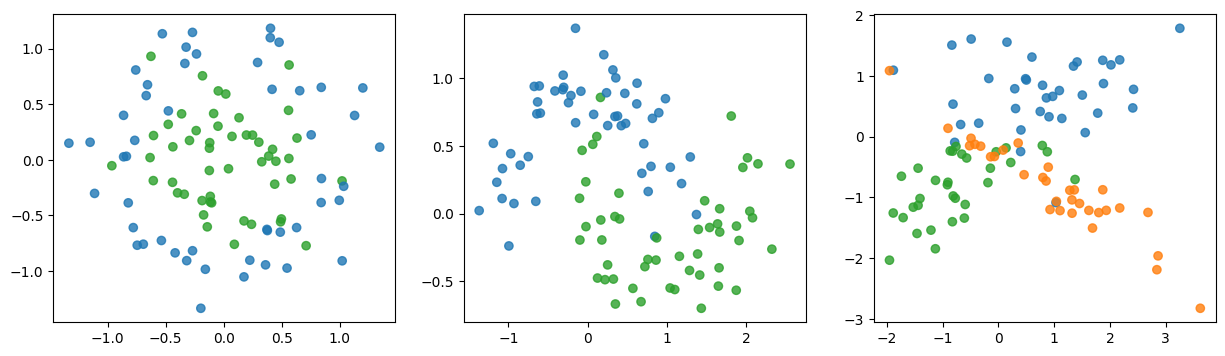

In [20]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [4]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

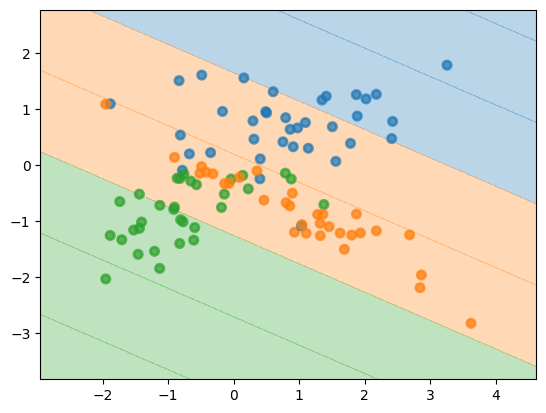

In [21]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset: Circles
Train Accuracy: 1.00
Test Accuracy: 0.65


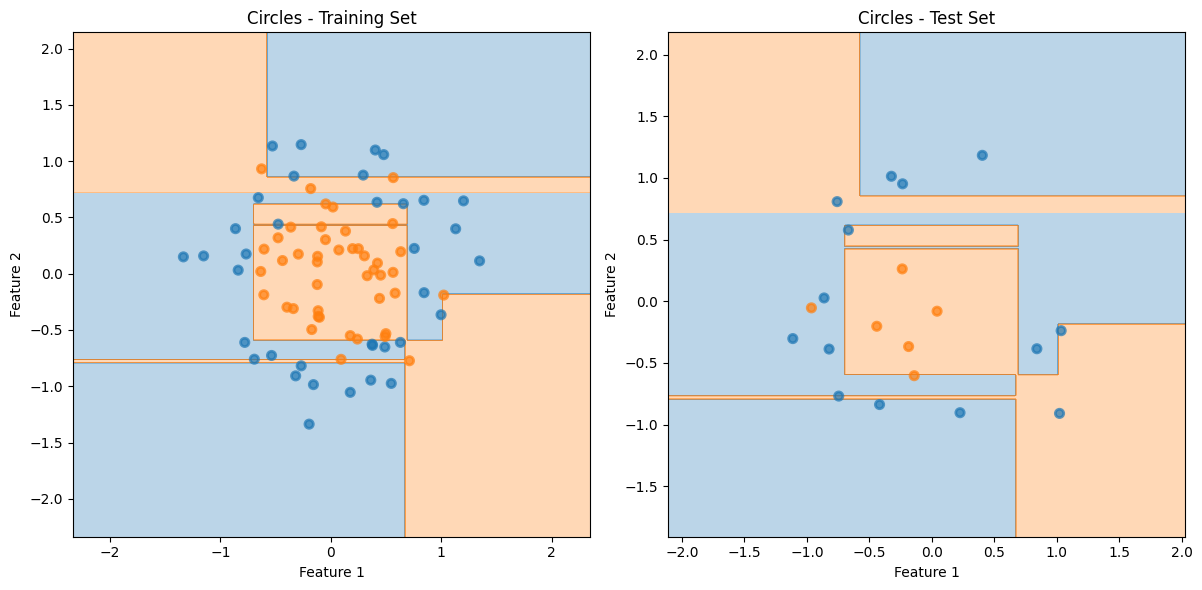

Dataset: Moons
Train Accuracy: 1.00
Test Accuracy: 0.95


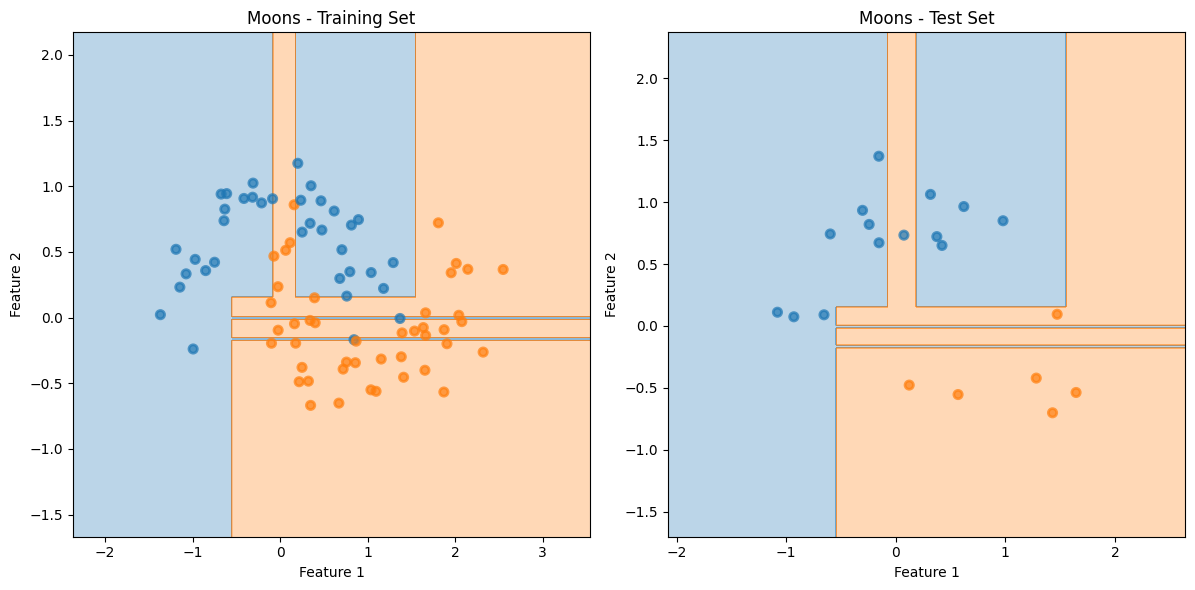

Dataset: Classification
Train Accuracy: 1.00
Test Accuracy: 0.70


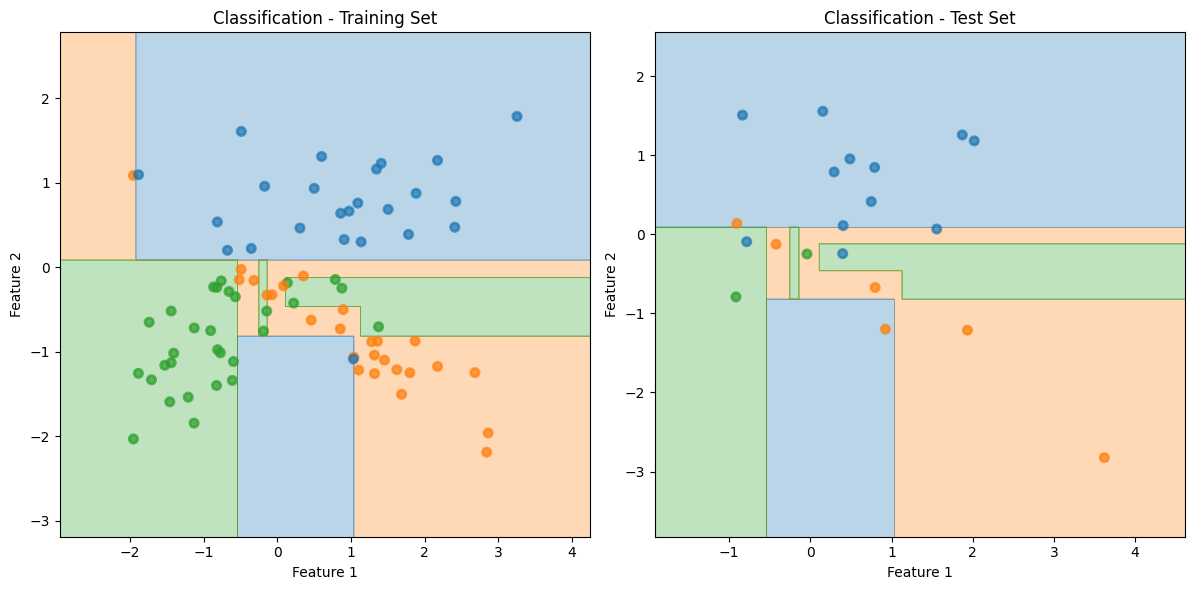

In [4]:
# Функция для построения разделяющих поверхностей
def plot_surface(clf, X, y, title):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# Задаем датасеты и их названия
datasets = [
    (make_circles(noise=0.2, factor=0.5, random_state=42), "Circles"),
    (make_moons(noise=0.2, random_state=42), "Moons"),
    (make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                         n_redundant=0), "Classification")
]

# Проход по каждому датасету
for (X, y), name in datasets:
    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

    # Обучение решающего дерева
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Прогнозирование и расчет accuracy
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Dataset: {name}")
    print(f"Train Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")

    # Построение графиков
    plt.figure(figsize=(18, 6))

    # График для обучающей выборки
    plt.subplot(1, 3, 1)
    plot_surface(clf, X_train, y_train, f"{name} - Training Set")

    # График для тестовой выборки
    plt.subplot(1, 3, 2)
    plot_surface(clf, X_test, y_test, f"{name} - Test Set")


    plt.tight_layout()
    plt.show()

__Ответ:__

Dataset: Circles
Сильно переобучено. Высокая точность на обучающей выборке и значительно низкая на тестовой указывают на то, что модель запомнила обучающие данные, но не может обобщать на новых данных.
Dataset: Moons
Не сильно переобучено. Хотя точность на обучающей выборке максимальная, высокая точность на тестовой выборке (0.95) говорит о том, что модель хорошо обобщает.
Dataset: Classification
Сильно переобучено. Как и в случае с "Circles", высокая точность на обучающей выборке и значительно более низкая на тестовой указывают на проблемы с обобщением.





# **__2. (1.5 балла)__**

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Max Depth: 1, Min Samples Leaf: 1
Train Accuracy: 0.66, Test Accuracy: 0.63


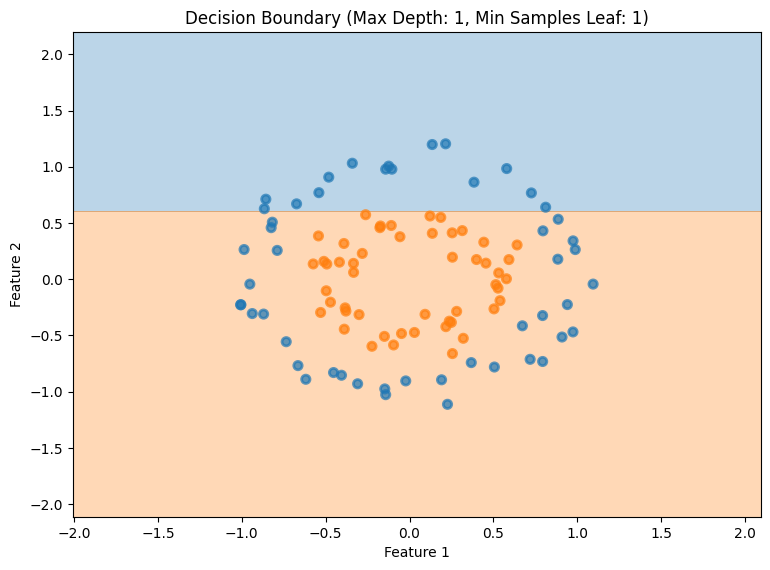

Max Depth: 1, Min Samples Leaf: 5
Train Accuracy: 0.66, Test Accuracy: 0.63


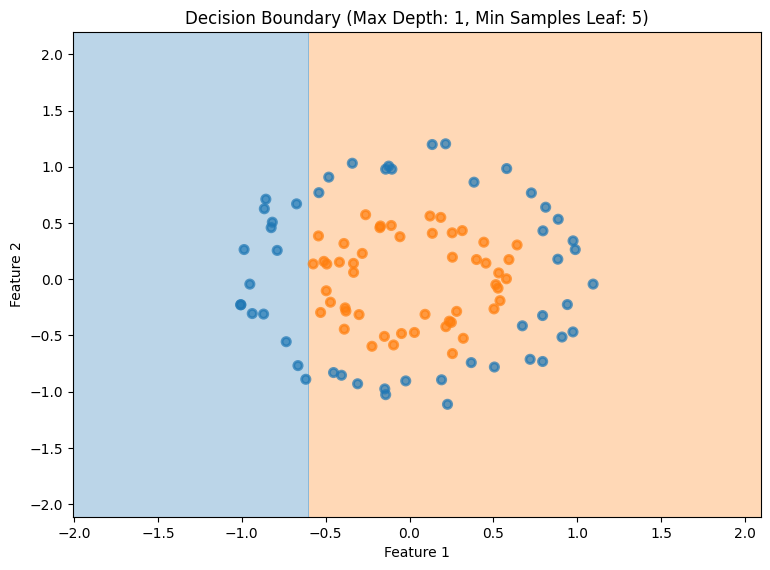

Max Depth: 1, Min Samples Leaf: 10
Train Accuracy: 0.66, Test Accuracy: 0.63


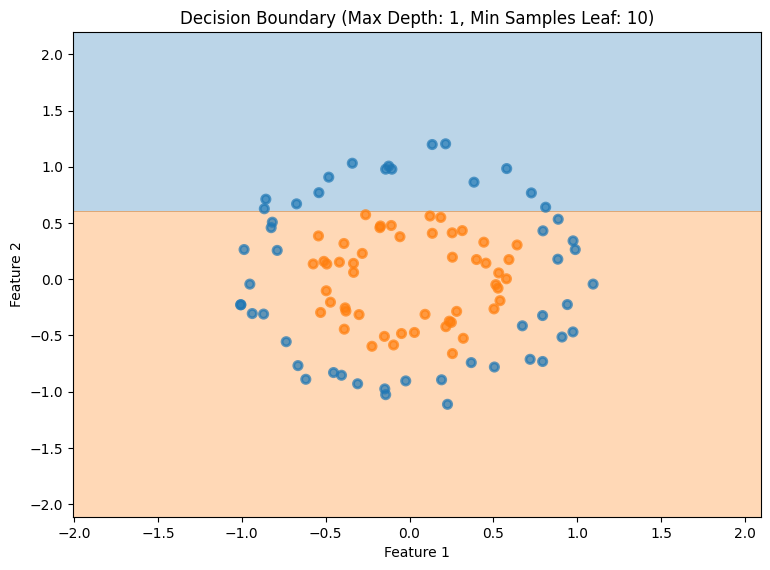

Max Depth: 3, Min Samples Leaf: 1
Train Accuracy: 0.91, Test Accuracy: 0.87


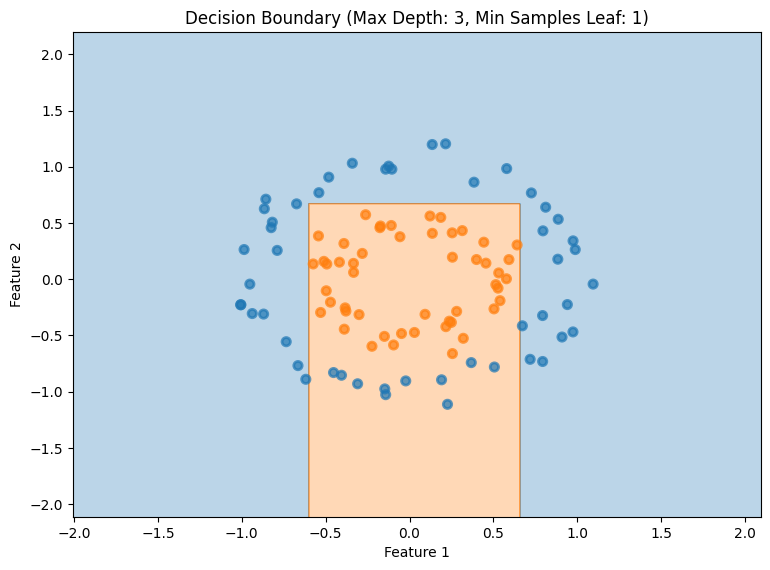

Max Depth: 3, Min Samples Leaf: 5
Train Accuracy: 0.91, Test Accuracy: 0.87


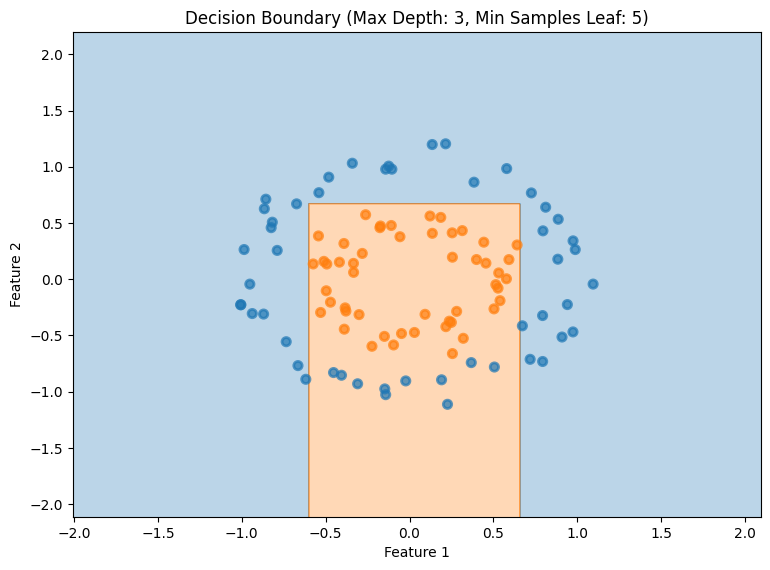

Max Depth: 3, Min Samples Leaf: 10
Train Accuracy: 0.87, Test Accuracy: 0.80


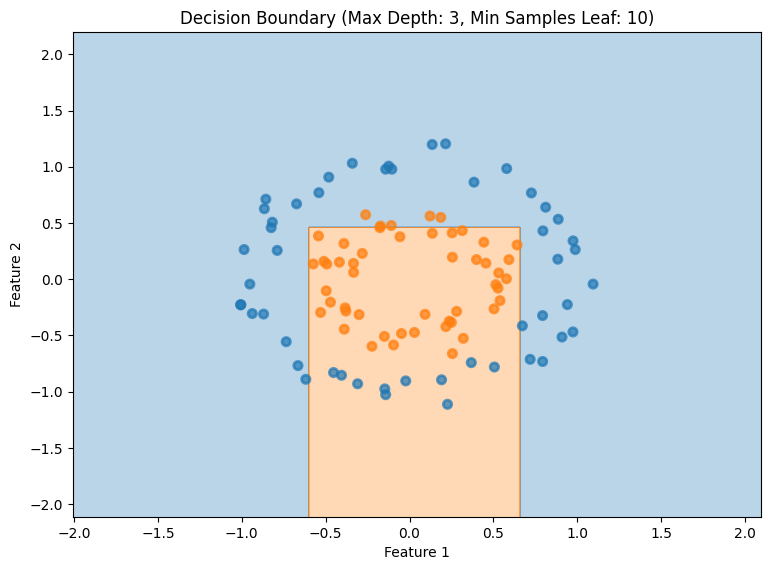

Max Depth: 5, Min Samples Leaf: 1
Train Accuracy: 1.00, Test Accuracy: 1.00


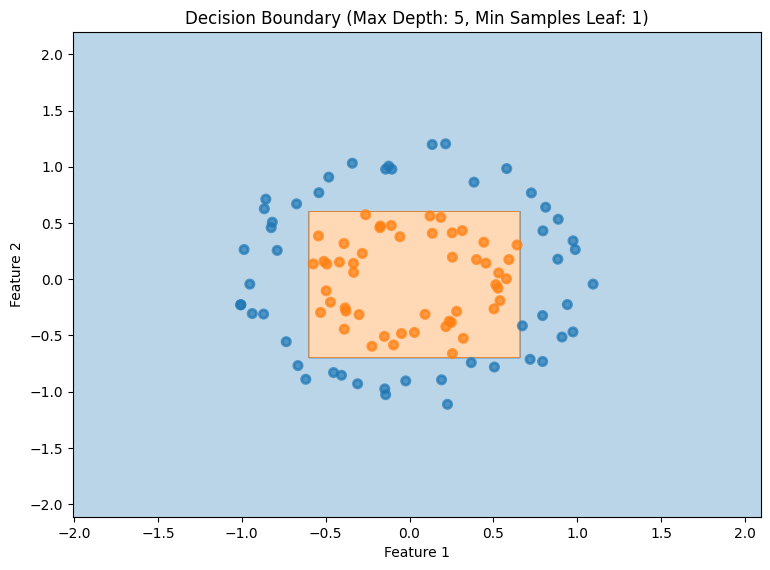

Max Depth: 5, Min Samples Leaf: 5
Train Accuracy: 1.00, Test Accuracy: 1.00


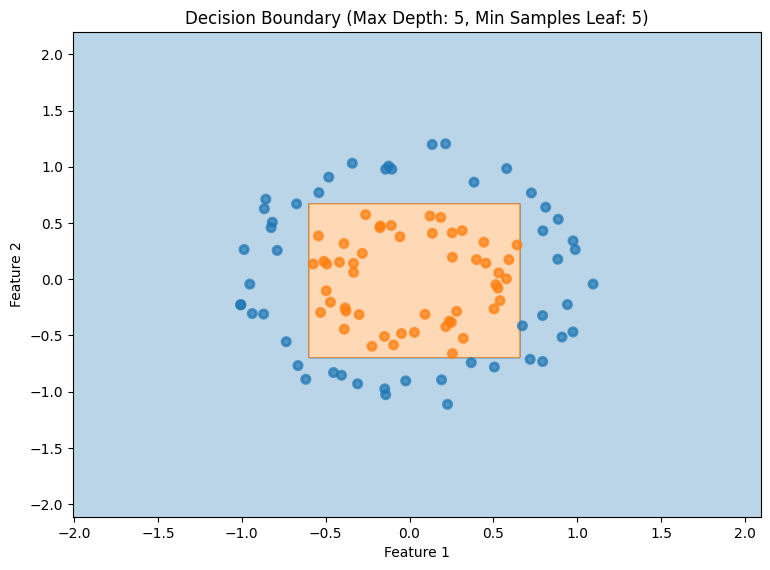

Max Depth: 5, Min Samples Leaf: 10
Train Accuracy: 0.91, Test Accuracy: 0.83


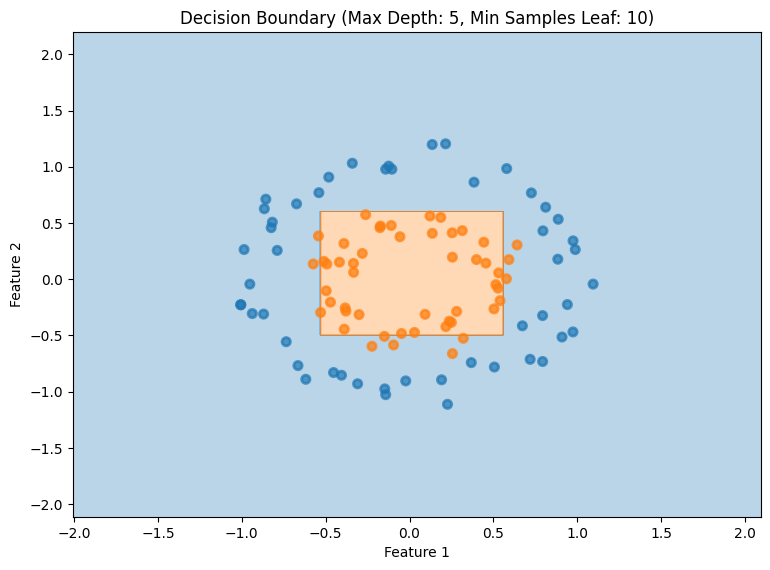

Max Depth: 1, Min Samples Leaf: 1
Train Accuracy: 0.84, Test Accuracy: 0.83


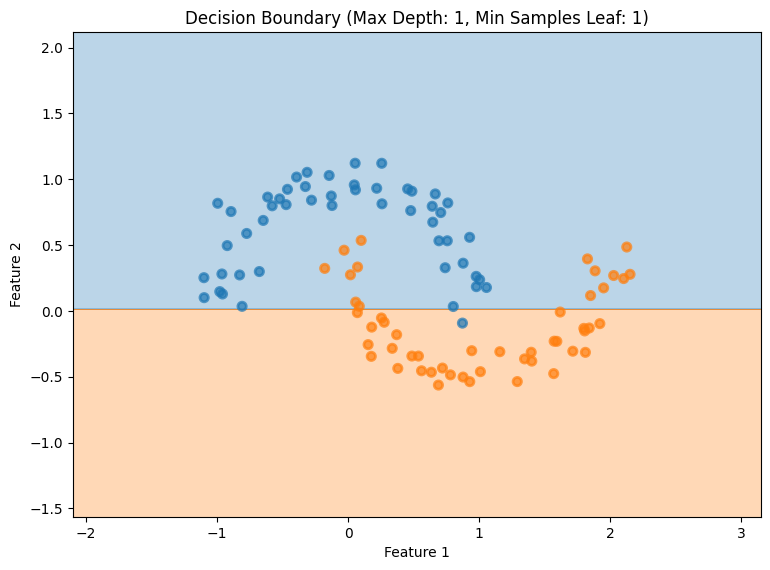

Max Depth: 1, Min Samples Leaf: 5
Train Accuracy: 0.84, Test Accuracy: 0.83


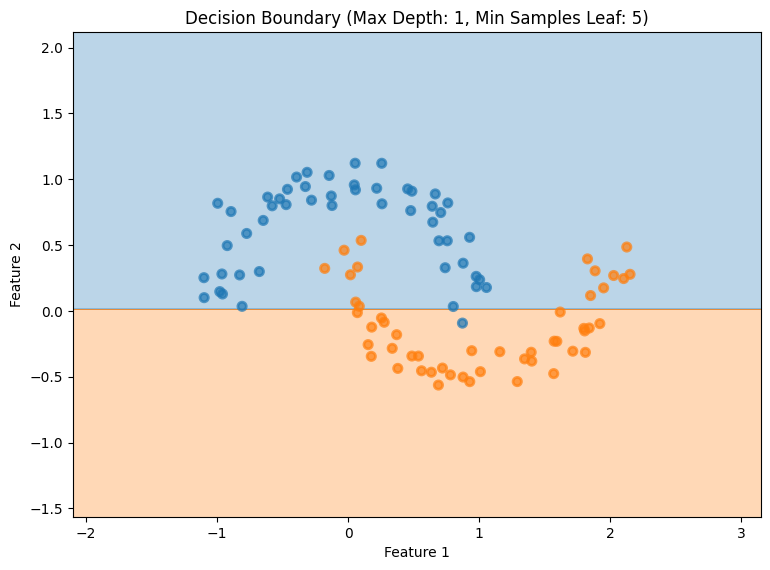

Max Depth: 1, Min Samples Leaf: 10
Train Accuracy: 0.84, Test Accuracy: 0.83


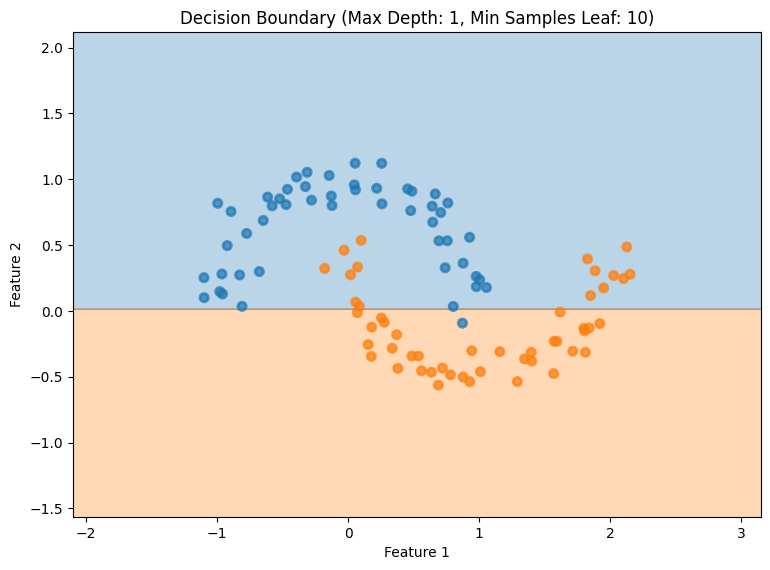

Max Depth: 3, Min Samples Leaf: 1
Train Accuracy: 0.93, Test Accuracy: 0.93


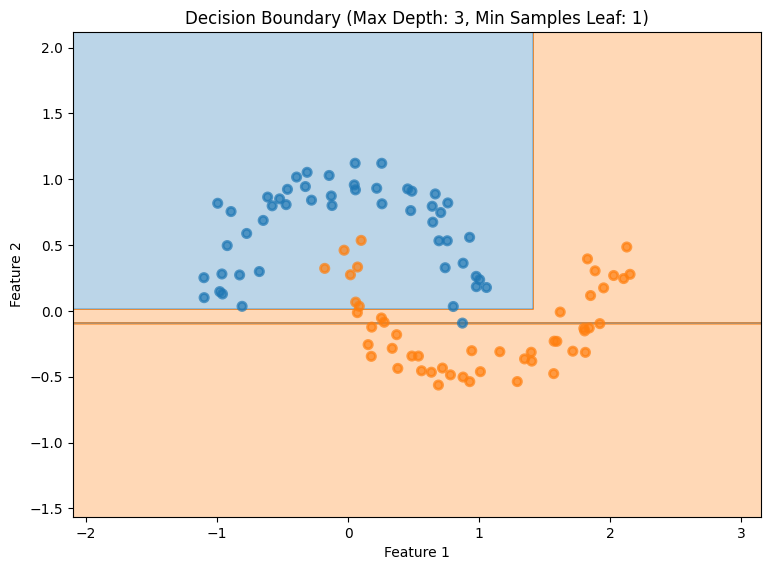

Max Depth: 3, Min Samples Leaf: 5
Train Accuracy: 0.91, Test Accuracy: 0.93


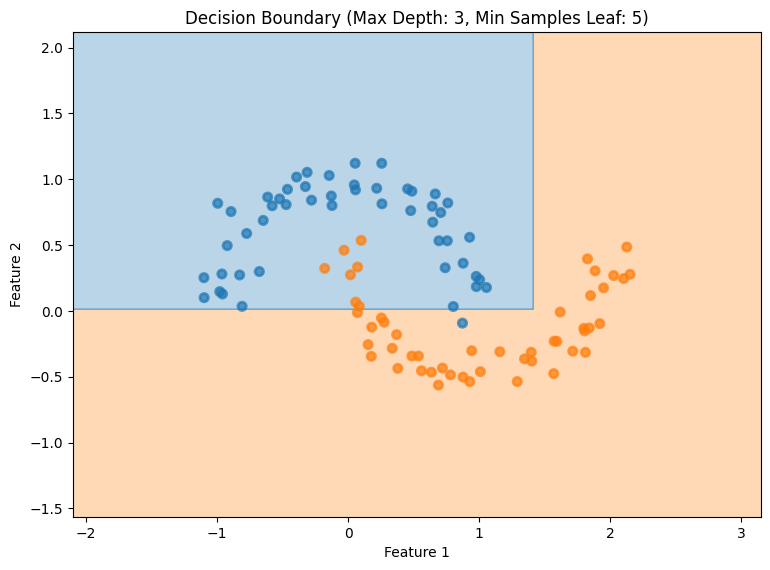

Max Depth: 3, Min Samples Leaf: 10
Train Accuracy: 0.87, Test Accuracy: 0.87


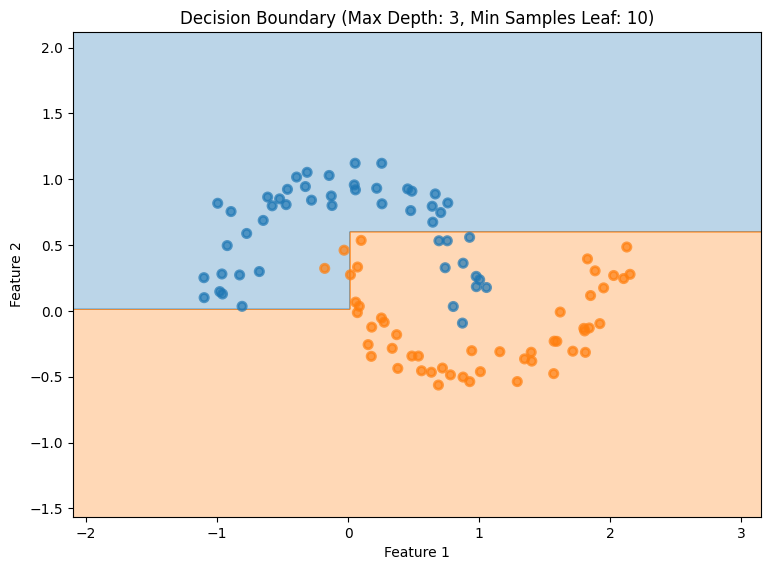

Max Depth: 5, Min Samples Leaf: 1
Train Accuracy: 1.00, Test Accuracy: 1.00


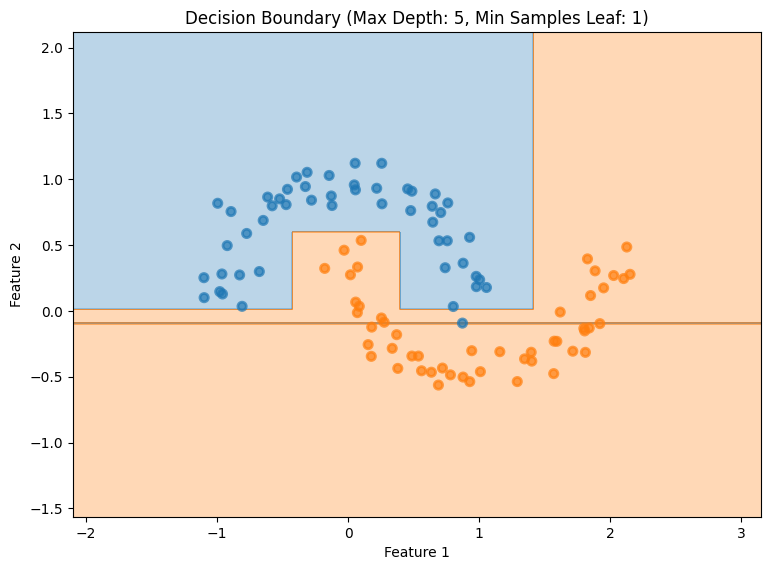

Max Depth: 5, Min Samples Leaf: 5
Train Accuracy: 0.99, Test Accuracy: 1.00


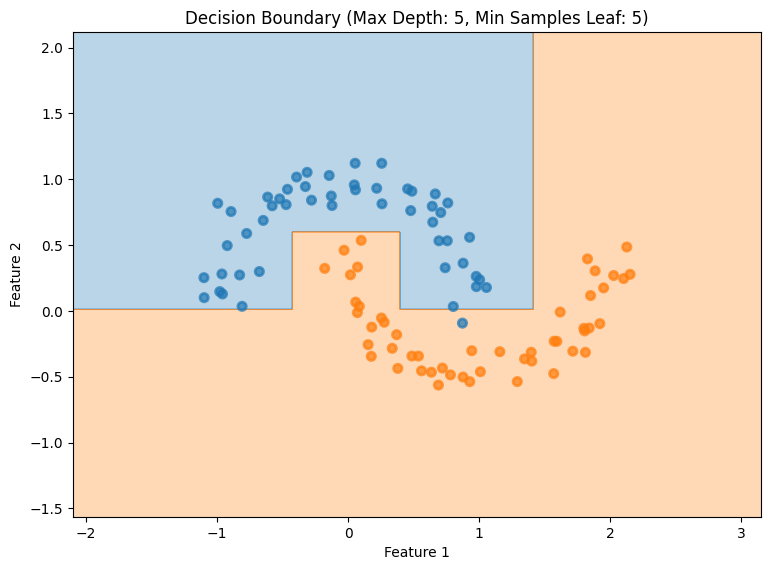

Max Depth: 5, Min Samples Leaf: 10
Train Accuracy: 0.87, Test Accuracy: 0.87


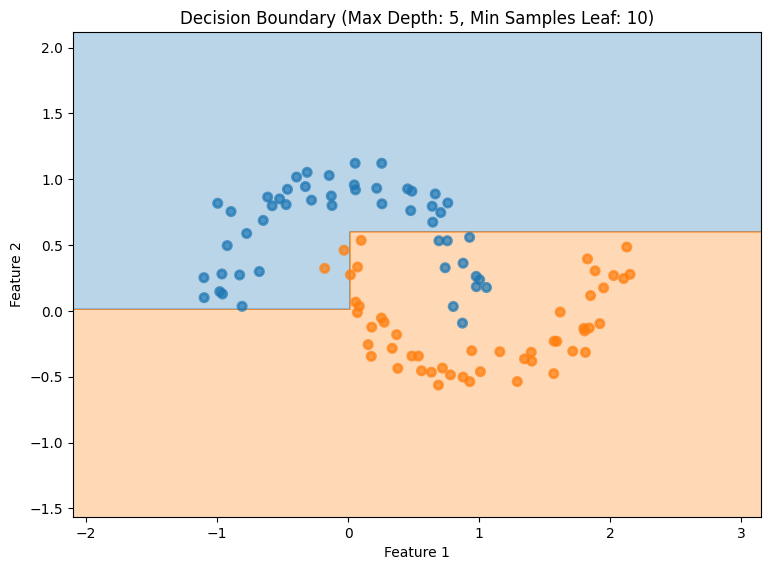

Max Depth: 1, Min Samples Leaf: 1
Train Accuracy: 0.93, Test Accuracy: 0.83


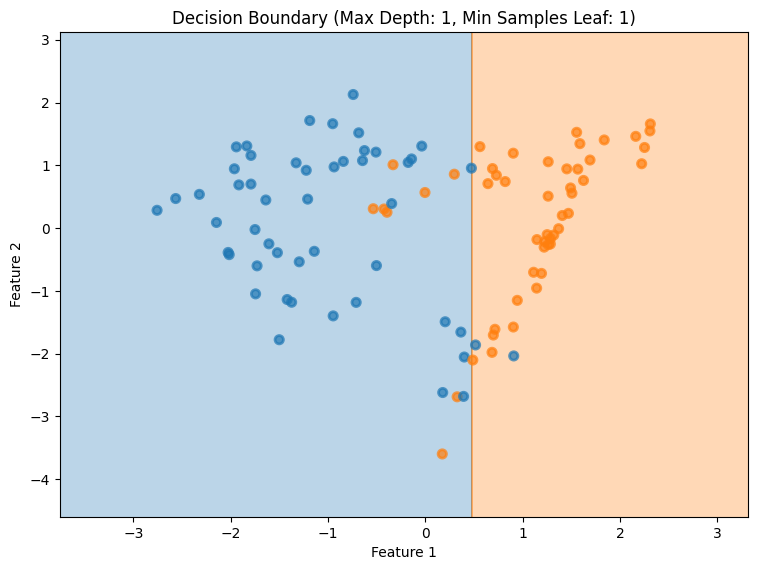

Max Depth: 1, Min Samples Leaf: 5
Train Accuracy: 0.93, Test Accuracy: 0.83


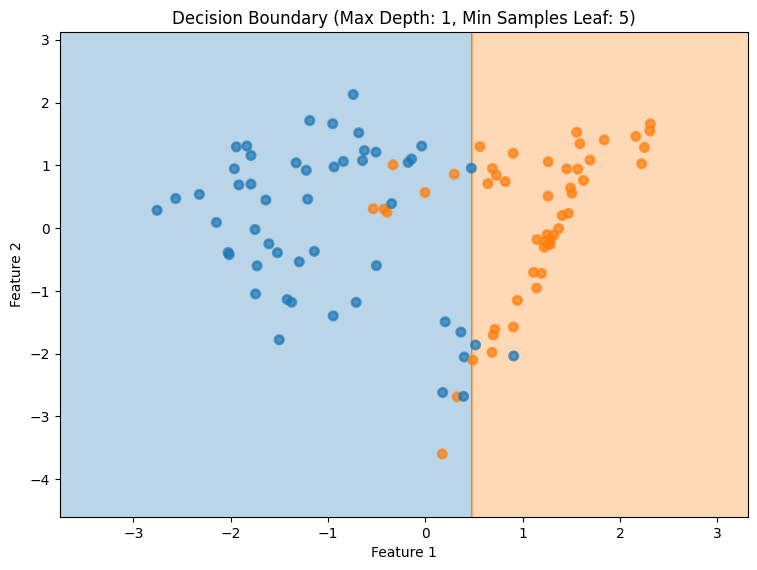

Max Depth: 1, Min Samples Leaf: 10
Train Accuracy: 0.93, Test Accuracy: 0.83


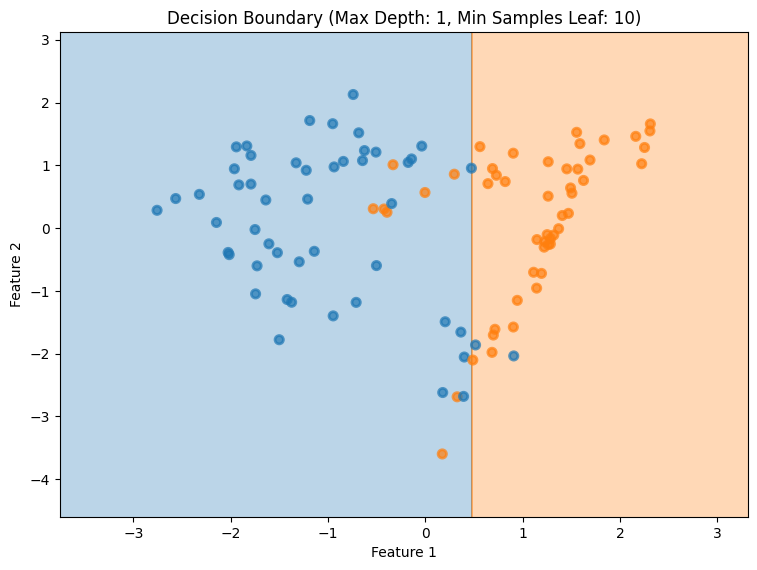

Max Depth: 3, Min Samples Leaf: 1
Train Accuracy: 0.96, Test Accuracy: 0.77


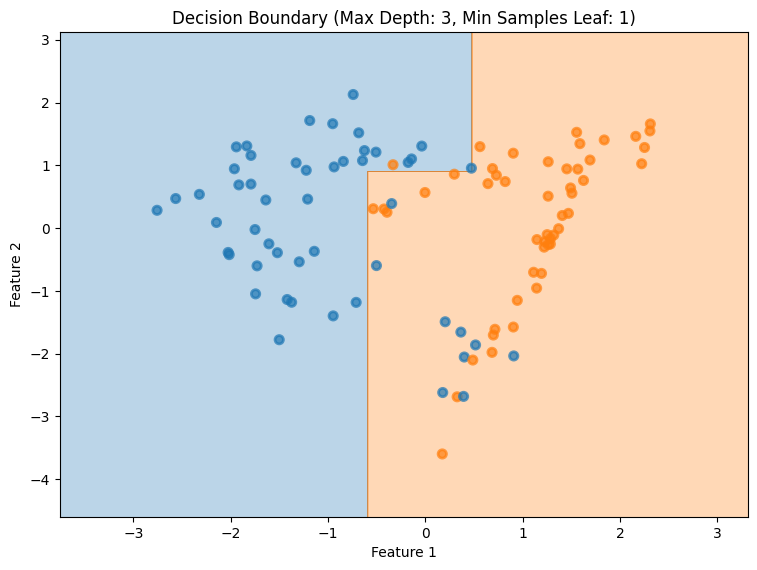

Max Depth: 3, Min Samples Leaf: 5
Train Accuracy: 0.96, Test Accuracy: 0.77


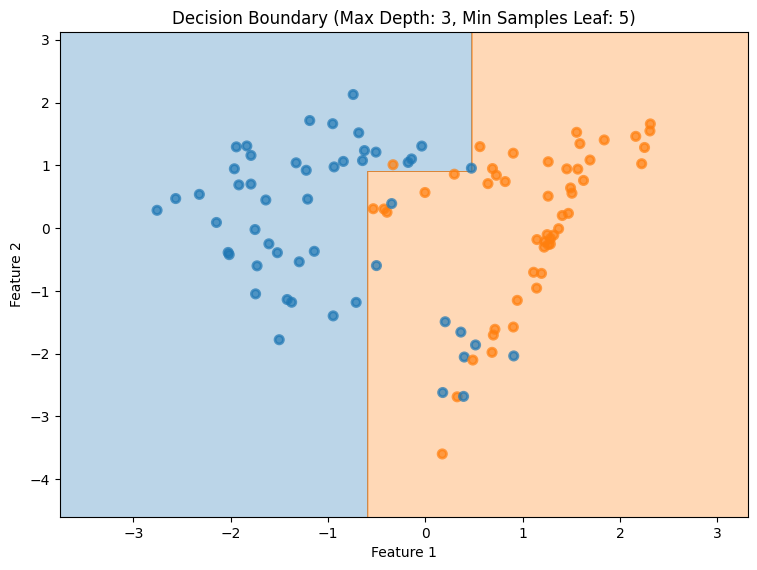

Max Depth: 3, Min Samples Leaf: 10
Train Accuracy: 0.93, Test Accuracy: 0.83


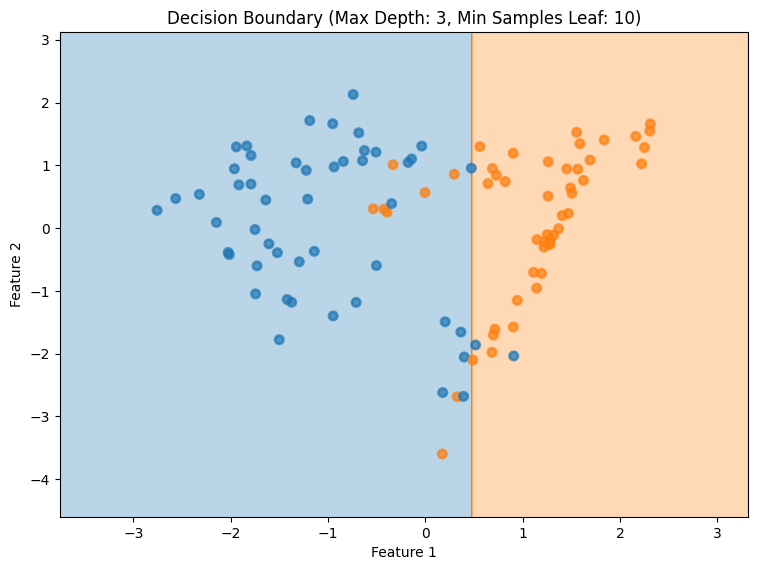

Max Depth: 5, Min Samples Leaf: 1
Train Accuracy: 0.99, Test Accuracy: 0.83


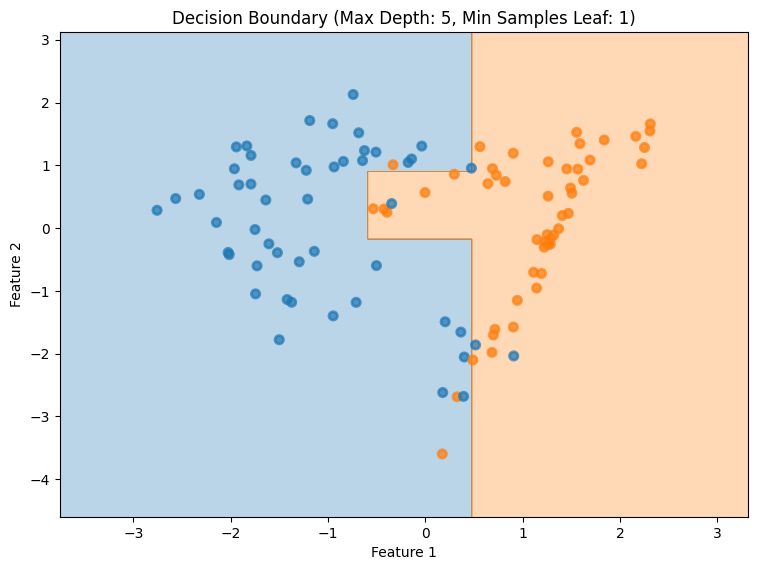

Max Depth: 5, Min Samples Leaf: 5
Train Accuracy: 0.96, Test Accuracy: 0.77


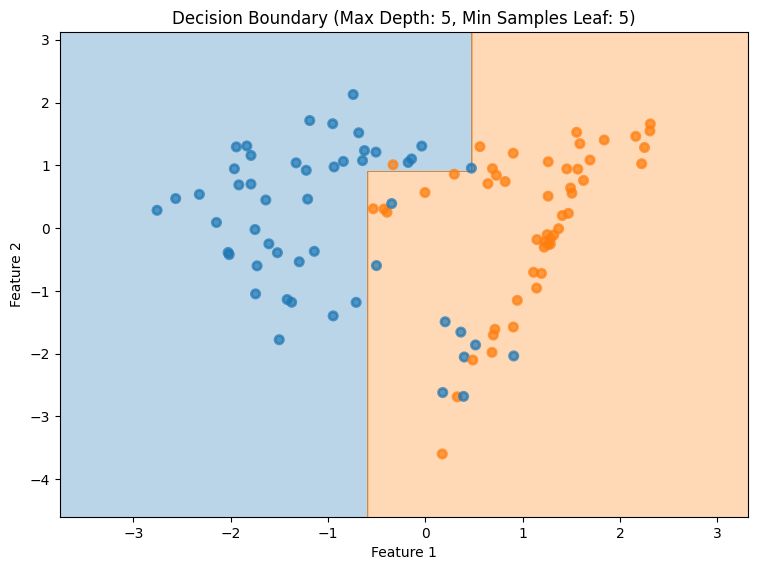

Max Depth: 5, Min Samples Leaf: 10
Train Accuracy: 0.93, Test Accuracy: 0.83


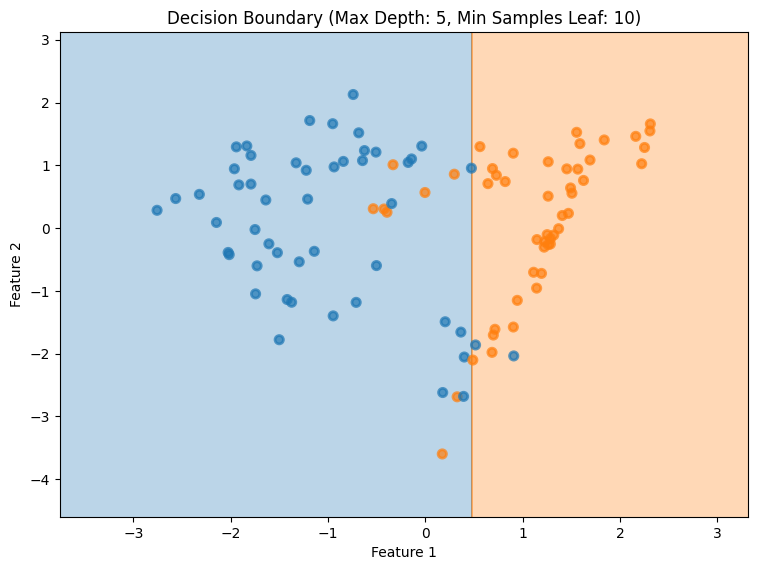

In [5]:
# Генерация данных
X_circles, y_circles = make_circles(n_samples=100, noise=0.1, factor=0.5)
X_moons, y_moons = make_moons(n_samples=100, noise=0.1)
X_classification, y_classification = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0)

def plot_surface(clf, X, y):
    plot_step = 0.01
    # Определяем палитру с оранжевым, зеленым и синим цветами
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette[:len(np.unique(y))])  # Используем нужное количество цветов

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

max_depths = [1, 3, 5]
min_samples_leaves = [1, 5, 10]
datasets = [(X_circles, y_circles), (X_moons, y_moons), (X_classification, y_classification)]

for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leaves:
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            clf.fit(X_train, y_train)

            train_accuracy = accuracy_score(y_train, clf.predict(X_train))
            test_accuracy = accuracy_score(y_test, clf.predict(X_test))

            print(f"Max Depth: {max_depth}, Min Samples Leaf: {min_samples_leaf}")
            print(f"Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

            plt.figure(figsize=(8, 6))
            plt.title(f'Decision Boundary (Max Depth: {max_depth}, Min Samples Leaf: {min_samples_leaf})')
            plot_surface(clf, X, y)
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.show()

__Ответ:__

Увеличение гиперпараметров может улучшить соответствие модели выборке, однако на определённом этапе это приводит к переобучению, так как модель начинает фокусироваться не на общей структуре данных, а на каждом отдельном объекте. Это, в свою очередь, может негативно сказаться на метриках на тестовой выборке. Важно отметить, что влияние параметров варьируется для разных наборов данных; например, в выборке с тремя классами переобучение при увеличении max_depth может наступить раньше.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

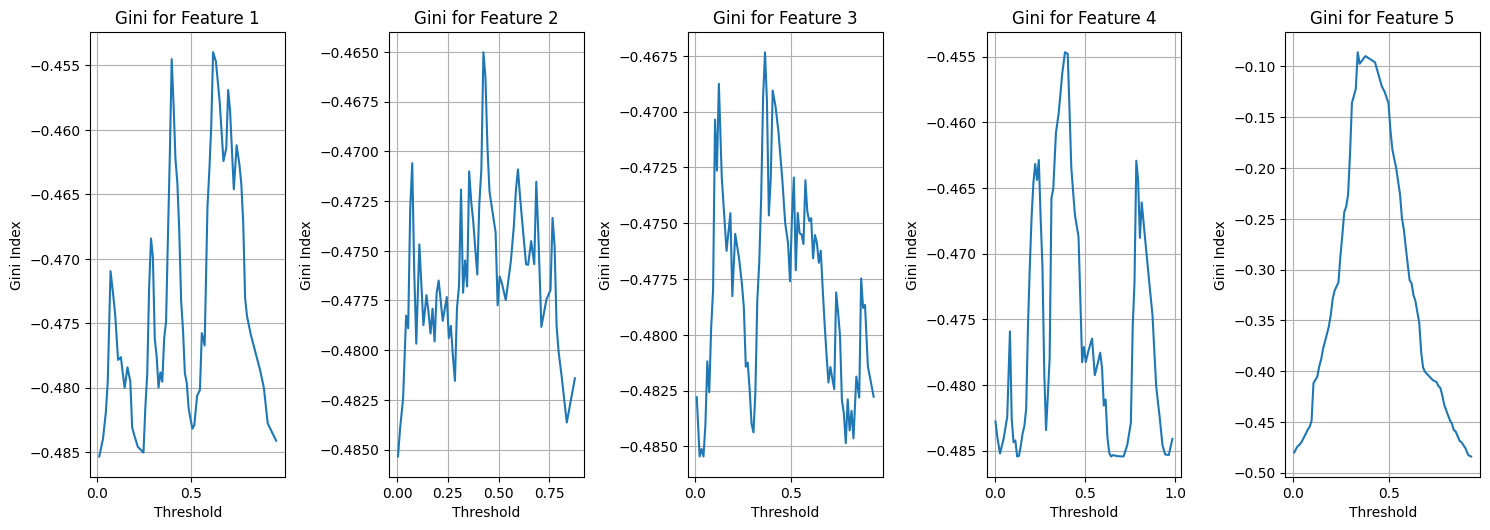

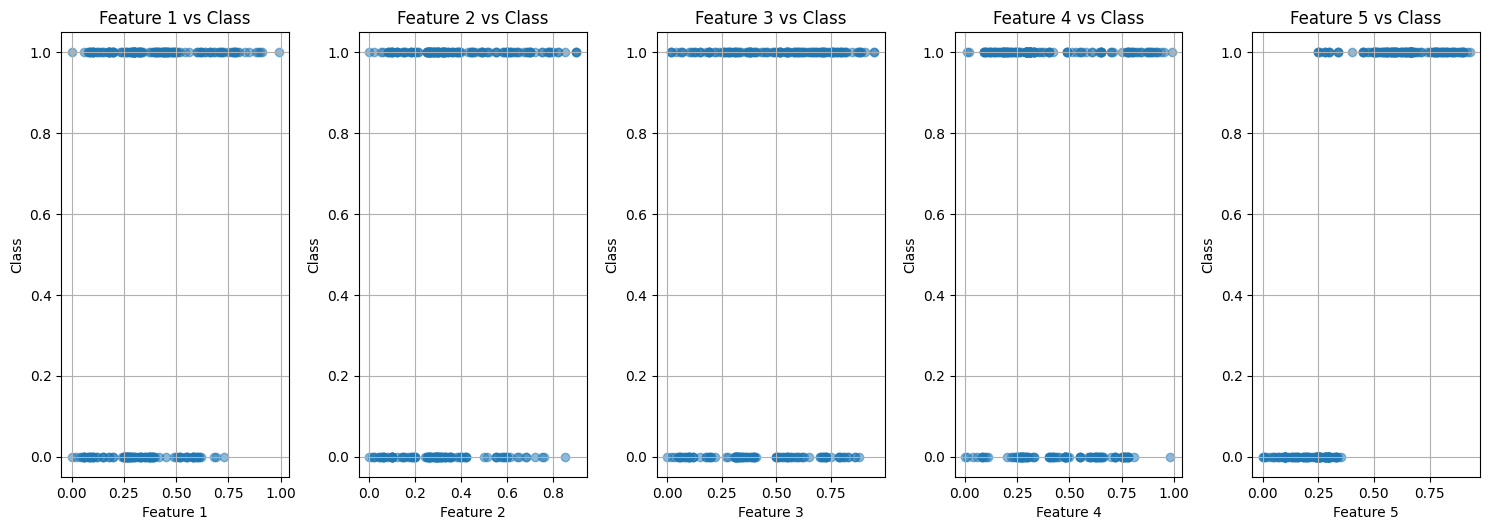

In [19]:
from hw5code import find_best_split
# Загрузка данных
data = pd.read_csv('students-2.csv')

# Преобразование всех признаков в числовой формат и обработка ошибок
for col in data.columns[:-1]:  # Все столбцы, кроме последнего (целевой переменной)
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Удаление строк с пропусками
data.dropna(inplace=True)

# Разделение на признаки и целевую переменную
X = data.iloc[:, :-1].values  # Первые пять столбцов
y = data.iloc[:, -1].values    # Последний столбец

# Подготовка графиков
plt.figure(figsize=(15, 10))

for i in range(X.shape[1]):
    thresholds, ginis, _, _ = find_best_split(X[:, i], y)

    if ginis is not None and len(ginis) > 0:
        # График "порог — значение критерия Джини"
        plt.subplot(2, 5, i + 1)
        plt.plot(thresholds, ginis, label=f'Feature {i+1}')
        plt.title(f'Gini for Feature {i+1}')
        plt.xlabel('Threshold')
        plt.ylabel('Gini Index')
        plt.grid()
    else:
        plt.subplot(2, 5, i + 1)
        plt.title(f'Feature {i+1} - No Data')
        plt.axis('off')

plt.tight_layout()
plt.show()

# Визуализация scatter-графиков "значение признака — класс"
plt.figure(figsize=(15, 10))

for i in range(X.shape[1]):
    plt.subplot(2, 5, i + 1)
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.title(f'Feature {i+1} vs Class')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Class')
    plt.grid()

plt.tight_layout()
plt.show()

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

Для определения, по какому признаку следует производить деление выборки на два поддерева, нужно обратить внимание на значения критерия Джини, которые мы получили для каждого признака. Признак, который соответствует наименьшему значению критерия Джини (наиболее "чистый" раздел), будет наиболее подходящим для деления.

Сравнение кривых Джини и scatter-графиков

1. Выбор признака для деления:

   • Признак с наименьшим значением критерия Джини указывает на то, что при разделении по этому признаку классы будут более четко отделены друг от друга. Если график показывает резкое падение значения Джини при определенном пороге, это может свидетельствовать о том, что выборка делится почти идеально.

2. Визуальная оценка scatter-графиков:

   • На scatter-графиках можно увидеть, насколько четко классы разделены по выбранному признаку. Если точки одного класса находятся в одной области, а другого — в другой, это согласуется с низким значением Джини. Если же классы смешаны, это будет видно и на графиках, и в значениях критерия Джини.

Описание кривой для "хороших" признаков

• Хорошие признаки:

  • Кривая Джини для хороших признаков будет иметь четкое падение до минимального значения при сравнительно небольшом количестве порогов. Это указывает на то, что существует четкое разделение между классами.

  • Например, если кривая резко падает и затем остается на низком уровне, это говорит о том, что разделение по этому признаку эффективно.

Отличия кривых для "плохих" признаков

• Плохие признаки:

  • Кривая Джини для плохих признаков будет более плоской и не будет показывать значительного снижения значения при различных порогах. Это означает, что независимо от выбранного порога, классы не будут четко отделены.

  • Если кривая колеблется вокруг высокого значения Джини, это указывает на то, что разделение по этому признаку неэффективно.


__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Загрузка данных
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')

# Преобразование категориальных признаков в числовые
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Разделение на признаки и целевую переменную
X = data.iloc[:, :-1].values  # Все столбцы, кроме последнего
y = data.iloc[:, -1].values    # Последний столбец

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)

# Предсказания
y_pred = decision_tree.predict(X_test)

# Вычисление accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.6529


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
<!--- * [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)-->
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [36]:
def evaluate_models(X, y):
    results = {}

    # Проверка на пустоту
    if X.empty or y.empty:
        raise ValueError("Input data X or y is empty.")

    # Проверка на наличие пропусков
    if X.isnull().values.any() or y.isnull().values.any():
        raise ValueError("Input data contains NaN values.")

    # DecisionTree для числовых данных
    X_numeric = X.select_dtypes(include=['number'])
    if not X_numeric.empty:
        dt_numeric = DecisionTreeClassifier()
        results['DecisionTree (numeric)'] = cross_val_score(dt_numeric, X_numeric.astype(float), y, cv=10, scoring=make_scorer(accuracy_score)).mean()
    else:
        results['DecisionTree (numeric)'] = None

    # DecisionTree с Label Encoding
    le = LabelEncoder()
    try:
        X_encoded = X.apply(le.fit_transform)
        dt_categorical = DecisionTreeClassifier()
        results['DecisionTree (categorical)'] = cross_val_score(dt_categorical, X_encoded, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
    except Exception as e:
        results['DecisionTree (categorical)'] = f"Error: {e}"

    # DecisionTree с One-Hot Encoding всех признаков
    try:
        ohe = OneHotEncoder(sparse_output=False)
        X_onehot = ohe.fit_transform(X.astype(str))
        dt_onehot = DecisionTreeClassifier()
        results['DecisionTree (one-hot)'] = cross_val_score(dt_onehot, X_onehot, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
    except Exception as e:
        results['DecisionTree (one-hot)'] = f"Error: {e}"

    # DecisionTree для категориальных данных
    try:
        # Используем One-Hot Encoding для категориальных данных
        ohe = OneHotEncoder(sparse_output=False)
        X_categorical = ohe.fit_transform(X.astype(str))
        dt_categorical_all = DecisionTreeClassifier()
        results['DecisionTree (categorical all)'] = cross_val_score(dt_categorical_all, X_categorical, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
    except Exception as e:
        results['DecisionTree (categorical all)'] = f"Error: {e}"

    # Создание DataFrame из результатов
    results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])

    return results_df

# Оценка моделей для каждого набора данных
results_mushrooms = evaluate_models(X_mushrooms, y_mushrooms)
results_cars = evaluate_models(X_cars, y_cars)
results_nursery = evaluate_models(X_nursery, y_nursery)

# Создание итогового DataFrame с результатами
results_df = pd.concat([results_mushrooms.rename(columns={'Accuracy': 'Mushrooms'}),
                         results_cars.rename(columns={'Accuracy': 'Cars'}),
                         results_nursery.rename(columns={'Accuracy': 'Nursery'})], axis=1)

print(results_df)

                                Mushrooms      Cars  Nursery
DecisionTree (numeric)                NaN       NaN      NaN
DecisionTree (categorical)       0.961123  0.917916      1.0
DecisionTree (one-hot)           0.956443  0.871098      1.0
DecisionTree (categorical all)   0.956443  0.870520      1.0


__16. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

**Анализ результатов**

1. Ранжирование алгоритмов:

   • Для набора данных "Mushrooms" наилучшие результаты показали модели с категориальными данными, как "DecisionTree (categorical)" и "DecisionTree (one-hot)", с точностью около 96% и 95%. "DecisionTree (numeric)" не смогла получить результаты, вероятно, из-за отсутствия числовых признаков.

   • В наборе данных "Cars" также наблюдается, что модели с категориальными данными показывают лучшие результаты, но точности ниже, чем в "Mushrooms". "DecisionTree (one-hot)" и "DecisionTree (categorical all)" демонстрируют схожие результаты, что указывает на схожесть в обработке категориальных переменных.

   • Набор данных "Nursery" показывает наилучшие результаты для всех моделей, достигая 100% точности для категориальных данных. Это может быть связано с тем, что данные в этом наборе более однородные или менее сложные для классификации.

**Сравнение ранжирования**

Ранжирование алгоритмов не одинаково для всех наборов данных. Например, "DecisionTree (numeric)" не дала результатов для "Mushrooms", что делает ее ненадежной для этого набора. В то время как "Nursery" демонстрирует высокую точность для всех моделей, что может указывать на простоту задачи.

**Компоненты случайности**

В алгоритмах машинного обучения присутствует компонент случайности, связанный с:

• Случайным разделением данных: При кроссвалидации данные разбиваются на обучающие и тестовые выборки случайным образом. Это может влиять на стабильность результатов.

• Инициализацией параметров: Некоторые алгоритмы могут иметь случайные параметры инициализации, что влияет на конечный результат.

**Улучшение работы алгоритмов**

1. Фиксация случайности: Установка фиксированного значения для генератора случайных чисел (например, random_state в DecisionTreeClassifier) может помочь сделать результаты более воспроизводимыми.

2. Тонкая настройка гиперпараметров: Использование методов, таких как Grid Search или Random Search для поиска оптимальных гиперпараметров модели.

3. Увеличение объема данных: Если это возможно, увеличение объема обучающих данных может улучшить обобщающую способность модели.

4. Использование ансамблевых методов: Методы, такие как Random Forest или Gradient Boosting, могут повысить точность за счет объединения нескольких деревьев решений.

5. Предобработка данных: Убедиться, что данные очищены и нормализованы